# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo VII - Dados não estruturados: sinais e imagens</span>

### <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">As respostas devem ser dadas no Moodle, o notebook deve ser usado para executar código para obtenção dos resultados.</span>

---

In [1]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Questão 1)

São exemplos típicos de dados não estruturados do tipo sequencial:

(a) a coluna idade de uma tabela de um banco de dados, ordenada de forma ascendente<br>
(b) os valores de uma tabela de base de dados relacional de fornecedores<br>
<font color='red'>(c) quantidade de engajamentos em posts de um determinado perfil coletados diariamente</font><br>
(d) uma imagem de satélite capturada em determinado dia e hora<br>

Sinais são dados não estruturados que possuem características sequencial.<br>

(a) Errado: Idades são dados estruturados iid (independentes e identicamente distribuídos), mesmo que ordenados continuam sendo estruturados.<br>
(b) Errado: Tabela com dados relacionais de fornecedores são dados estruturados.<br>
(c) **Certo**: Qtidade de engajamentos por dia representam um sinal com resolução de 1 dado por dia e frequência de 1 dia.<br>
(d) Errado: Imagens de satélite são dados não estruturados com dependência espacial. Porém uma única foto não representa um dado sequencial.<br>    

### Questão 2)

São exemplos típicos de dados não estruturados espaciais:

(a) áudio capturado de uma sala de reuniões<br>
(b) valores de umidade relativa do ar obtidos armazenados a cada hora<br>
<font color='red'>(c) mapa de calor formado por temperaturas coletadas em 20 cidades de uma determinada região</font><br>
(d) a quantidade atual de acessos à diversas seções de uma página web<br>

(a) Errado: Áudios são sinais coletados por sensores a uma taxa alta de amostragem (medida em Hertz / Hz), com muitos pontos por unidade de tempo.<br>
(b) Errado: Umidade relativa a cada hora são sinais com dependência do tempo.<br>
(c) **Certo**: Um mapa de calor de uma região representam dados estruturados com dependência espacial.<br>
(d) Errado: O número de acessos não tem dependência temporal ou espacial.<br>

### Questão 3)
 
Considere as seguintes afirmações sobre o método Bag-of-features:

I - sua etapa mais relevante é a classificação de vetores de características em classes pré-definidas<br>
II - quanto maior o tamanho do dicionário, melhor a representação resultante<br>
III - é equivalente ao método PCA para o caso de extração de características em dados não estruturados<br>
IV - é exclusivo para bases de dados de sinais e imagens<br>
V - pode-se utilizar qualquer característica como base para sua aplicação<br>
VI - sua maior vantagem é a flexibilidade no uso de diferentes etapas, e sua maior desvantagem é a necessidade de escolher bem cada uma dessas etapas consumindo tempo e recursos computacionais.<br>


São verdadeiras as afirmações:

(a) I, V e VI<br>
<font color='red'>(b) V e VI</font><br>
(c) II e V<br>
(d) III, IV e VI<br>

BoF:<br>
Passo 1: obter imagens e patches. Obtém-se uma lista dos patches: <br>
from sklearn.feature_extraction import extract_patches_2d<br>
Cada instância é uma imagem. Dimensões: no. imagens, no. patches, tamanho do patch (ex: 15x15xnúmero de dimensões)<br>
Passo 2: obter features a partir dos patches. Patches têm alta dimensionalidade. Pode ser usado o PCA como descritor ou extrator de características<br>
Cada instância é um patch = no. imagens * no. patches<br>
Passo 3: obter dicionário / codebook / vocabulário<br>
Número de clusters = no.de dicionários = no.de palavras visuais/features | padrão: 50 a 100 elementos <br>
Ex: método KMeans<br>
Passo 4: obter histogramas como features da Bag of Features<br>
Dimensões: no. imagens x no. palavras visuais<br>
Passo 5: utilizar as features para tarefas de reconhecimento<br>


I - Falso: As etapas críticas são a definição do descritor-base (PCA, cor, textura, pixels, uma combinação entre eles etc) e a definição do dicionário (quantidade de palavras visuais). O vetor de características é um histograma onde cada bin é um elemento do dicionário que contará a quantidade de patches (partes). <br>
II - Falso: Quanto maior o dicionário, maior a exigência computacional, mas que pode não se reverter em melhorar a representação se os patches escolhidos não forem representativos.<br>
III - Falso: É equivalente ao método Bag of Words. Pode ser usado PCA para a redução de dimensionalidade, mas os métodos são diferentes. <br>
IV - Falso: O método Bag of Features pode ser usado para quaisquer dados não estruturados. É um framework genérico para obter descritores aprendidos a partir dos dados. Pode ser usado para vários contextos e tipos de dados.<br>
V - **Certo**. Características-base: cor, textura, pixels, uma combinação entre eles etc. <br>
VI -**Certo**. O BOF não é um descritor, é um framework que inclui a descrição da imagem. <br> 

### Questão 4)

Carregue os dados do arquivo `pollution_nd.csv` utilizando o comando `pd.read_csv()`

Esse dataframe possui 4 linhas (0, 1, 2, 3) relativas à medição de dióxido de nitrogénio em 4 localizações. Foram feitas medições durante 5 dias a cada 5 minutos em diferentes posições de uma cidade, sendo que o primeiro deles (na primeira linha, posição 0) é sabido ter sido capturado em um bairro próximo à rodovia.

Queremos identificar qual das localizações desconhecidas (1, 2, 3) mais se assemelha a primeira (0). Para isso, extraia um vetor de características (para cada sinal) composto de:
* Entropia da energia (com 24 blocos)
* Entropia espectral (com 24 blocos)
* Centróide espectral (considere frequência = 0.2Hz)
* Dispersão espectral (considere frequência = 0.2Hz)

Compute a distância Euclidiana entre eles e identifique a linha mais próxima de 0. Nessa mais próxima (1, 2 ou 3) verifique qual característica (individualmente) dentre as computadas apresentou a menor distância com relação ao sinal 0, marcando a alternativa correta.

(a) Mais próxima: 3; característica mais próxima: Entropia da energia<br>
<font color='red'>(b) Mais próxima: 2; característica mais próxima: Dispersão espectral</font><br>
(c) Mais próxima: 2; característica mais próxima: Entropia espectral<br>
(d) Mais próxima: 3; característica mais próxima: Centróide espectral<br>
(e) Mais próxima: 1; característica mais próxima: Dispersão espectral<br>

### Funções de cálculo das características

In [2]:
def entropia_energia(sinal, n_blocos=24):
    '''Entropia da energia do sinal'''
    # energia total 
    energia_sinal = np.sum(sinal ** 2)
    M = len(sinal)
    
    # calcula janelas dentro do sinal
    M_janelas = int(np.floor(M / n_blocos))
    # verifica se tamanho dos blocos 
    # é multiplo do tamanho do sinal
    if M != M_janelas * n_blocos:
        sinal = sinal[0:M_janelas * n_blocos]

    # monta matriz [M_janelas x n_blocos]
    janelas = sinal.reshape(M_janelas, n_blocos, order='F').copy()
    
    # Computa energias de cada janela (normalizada pela do sinal)
    e_janelas = np.sum(janelas ** 2, axis=0) / (energia_sinal + 0.0001)
    #print(e_janelas)

    # Computa entropia entre energias das janelas
    entropia = -np.sum(e_janelas * np.log2(e_janelas + 0.0001))
    return entropia

In [3]:
def entropia_espectral(sinal, n_blocos=24):
    """Computes the spectral entropy"""
    fft_abs = np.abs(np.fft.fft(sinal))
    entropia_esp = entropia_energia(fft_abs, n_blocos=n_blocos)
    return entropia_esp

In [4]:
def centroide_dispersao_espectral(sinal, tx_amostragem=0.2):
    '''Calcula o centro de massa e dispersão do espectro do sinal'''
    
    fft_abs = np.abs( np.fft.fft(sinal) )
    N = len(fft_abs)
    
    # indices de frequencia
    ind = (np.arange(1, N+1)) * (tx_amostragem / (2.0*N))

    # calcula a distribuicao do espectro normalizando para soma unitária
    Xt = fft_abs.copy()       # calcula a distribuição do espectro
    Xt = Xt / Xt.max()        # normaliza pelo máximo
    NUM = np.sum(ind * Xt)    # obtém os índices do espectro
    DEN = np.sum(Xt) + 0.0001 # obtém os índices do espectro

    # Centroide:
    centroide = (NUM / DEN)

    # Dispersão:
    dispersao = np.sqrt(np.sum(((ind - centroide) ** 2) * Xt) / DEN)  # calcula o dp em relação ao centróide

    # Normalizando:
    centroide = centroide / (tx_amostragem / 2.0)
    dispersao = dispersao / (tx_amostragem / 2.0)

    return centroide, dispersao

### Lendo os dados

In [5]:
# data = np.genfromtxt('./dados/pollution_nd.csv', skip_header=1, delimiter=',').astype(np.float32)  # lendo com numpy
data = pd.read_csv('./dados/pollution_nd.csv').astype(np.float32)                                  # lendo com pandas
print(data.shape)
data

(4, 1431)


,0,1,2,3,4,5,6,7,8,9,...,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430
0,80.0,79.0,80.0,81.0,84.0,88.0,86.0,87.0,88.0,92.0,...,183.0,182.0,180.0,184.0,179.0,177.0,177.0,173.0,173.0,175.0
1,80.0,77.0,75.0,70.0,68.0,65.0,69.0,72.0,75.0,73.0,...,207.0,204.0,208.0,206.0,209.0,214.0,213.0,203.0,204.0,202.0
2,91.0,87.0,89.0,93.0,96.0,93.0,97.0,102.0,105.0,101.0,...,129.0,133.0,128.0,129.0,134.0,136.0,140.0,138.0,133.0,135.0
3,47.0,48.0,51.0,51.0,49.0,51.0,51.0,48.0,49.0,53.0,...,197.0,201.0,198.0,197.0,196.0,200.0,203.0,205.0,202.0,206.0


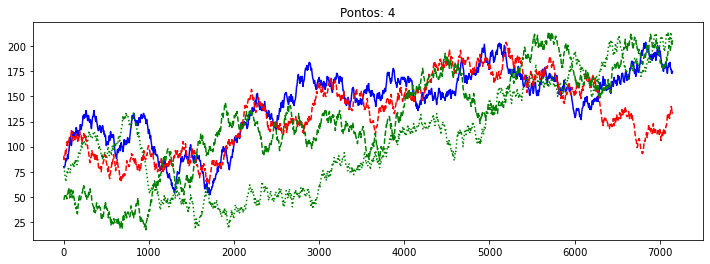

In [6]:
# definindo a amostragem ao longo do tempo
F = 5       # step= 5 min
# define os minutos totais de medição 
t_total = data.shape[1]*5    # stop = 7155 min
# prepara o eixo real onde iremos amostrar a funcao
t = np.arange(0, t_total, F)

#Criação dos vetores dos sinais
signal = np.zeros([data.shape[0], data.shape[1]])

for i in range(data.shape[0]):
#     signal[i] = np.array(data[i])        # para os dados lidos com numpy
    signal[i] = np.array(data.loc[i,:])  # para os dados lidos com pandas nas linhas
#     signal[i] = np.array(data[i])     # para os dados lidos com pandas nas colunas

plt.figure(figsize=(12,4))
plt.title("Pontos: %d" % signal.shape[0])
plt.plot(t, signal[0], 'b-')
plt.plot(t, signal[1], 'g:')
plt.plot(t, signal[2], 'r--')
plt.plot(t, signal[3], 'g--');


In [7]:
# Criação das features para cada um dos sinais
# feature[0] guarda as informações do sinal_0 e assim por diante
features = []
for i in range(signal.shape[0]):
    f1 = entropia_energia(signal[i])
    f2 = entropia_espectral(signal[i])
    f3 = centroide_dispersao_espectral(signal[i])[0]
    f4 = centroide_dispersao_espectral(signal[i])[1]
    features.append([f1, f2, f3, f4])

In [8]:
features_names = ['entropia_energia', 'entropia_espectral', 'centroide_espectral', 'dispersao_espectral']
pd.DataFrame(features, columns=features_names)

,entropia_energia,entropia_espectral,centroide_espectral,dispersao_espectral
0,4.404436,0.061114,0.341384,0.427854
1,4.007408,0.172790,0.385826,0.437998
2,4.380696,0.068126,0.325994,0.423855
3,4.177700,0.143115,0.386078,0.437956


In [9]:
# Criação da matriz com as distâncias 
# Essa matriz indica a dissimilaridade entre pares de sinais

features= np.array(features)
dmat = np.zeros([signal.shape[0],signal.shape[0]])  # Cria uma matriz quadrada e preenche com zeros
for i in range(signal.shape[0]):
    for j in range(signal.shape[0]):
        #dmat[i,j] = np.sum(np.abs(features[i]-features[j]))          # distância L1
        dmat[i,j] = np.sqrt(np.sum((features[i]-features[j])**2))     # distância Euclidiana
    
print(np.round(dmat,2))
print(np.round(np.sum(dmat, axis=1),2))

[[0.   0.41 0.03 0.25]
 [0.41 0.   0.39 0.17]
 [0.03 0.39 0.   0.23]
 [0.25 0.17 0.23 0.  ]]
[0.69 0.98 0.65 0.64]


In [10]:
pd.DataFrame(dmat)

,0,1,2,3
0,0.000000,0.414946,0.029421,0.245424
1,0.414946,0.000000,0.392529,0.172858
2,0.029421,0.392529,0.000000,0.225033
3,0.245424,0.172858,0.225033,0.000000


In [11]:
print('A menor distância do sinal_0 foi o sinal_2=', dmat[0,:][2].round(3))

A menor distância do sinal_0 foi o sinal_2= 0.029


In [12]:
# Diferença entre sinal_0 e sinal_2 para cada feature
# diff = np.abs(features[0]-features[2])             # distância L1
diff = np.sqrt((features[0]-features[2])**2)       # distância Euclidiana
diff

array([0.02373914, 0.00701252, 0.01539019, 0.00399846])

In [13]:
result = np.where(diff == np.amin(diff))
result

(array([3], dtype=int64),)

In [14]:
features_names

['entropia_energia',
 'entropia_espectral',
 'centroide_espectral',
 'dispersao_espectral']

In [15]:
print('Característica com a menor distância do sinal_2 em relação ao sinal_0:', features_names[3])

Característica com a menor distância do sinal_2 em relação ao sinal_0: dispersao_espectral


### Questão 5)

Carrege as imagens da base de dados `lfw_subset` contida na biblioteca `skimage`, conforme código abaixo. Considere apenas as 100 primeiras imagens dessa base de dados (referente a faces).

Vamos utilizar o método LBP (com implementação conforme visto nos exercícios e replicada abaixo) e a distância L1 para comparar faces dessa base de dados.

Utilizando como imagem de consulta a imagem de índice 94 (posição 95) da lista, e os seguintes parâmetros para o LBP:
* points = 18
* radius = 2
* n_bins = 32

Retorne as 5 imagens mais similares (excluindo a de consulta). Quais são os índices dessas imagens?

(a) 18, 90, 53, 46, 41<br>
(b) 75, 39, 86, 85, 68<br>
(c) 75, 39, 41, 47, 94<br>
<font color='red'>(d) 18, 75, 90, 93, 39</font><br>

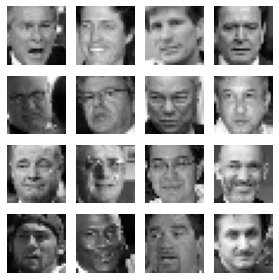

In [16]:
import matplotlib.pyplot as plt
import matplotlib
from skimage import feature
from skimage import data
fig, axes = plt.subplots(4, 4, figsize=(4, 4))
ax = axes.ravel()
imgs = data.lfw_subset()
for i in range(16):
    ax[i].imshow(imgs[i], cmap=plt.cm.gray)
    ax[i].axis('off')
fig.tight_layout()

In [17]:
def lbp_features(img, points=18, radius=2, n_bins=32):
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11

    # normaliza cada imagem para que o máximo = 255
    if (np.max(img) > 0):
        img = ((img/np.max(img))*255).astype(np.uint8)

    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img.astype(np.uint8), points, radius, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), range=(0, n_bins))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist

In [18]:
# Selecionando as 100 primeiras imagens
# Cada imagem tem a dimensão de 25 linhas x 25 colunas
imgs_100 = imgs[:100,:,:]
imgs_100.shape

(100, 25, 25)

In [19]:
npontos = 18
raio = 2
nbins = 32
features = np.zeros([imgs_100.shape[0], nbins])

# Para cada uma das imagens vamos construir um histograma dos padrões com a função lbp_features
for i in range(imgs_100.shape[0]):
    features[i] = lbp_features(imgs_100[i], npontos, raio, nbins)

print('Exemplo para a imagem_0:', features[0])
features.shape

Exemplo para a imagem_0: [0.08   0.0352 0.0384 0.0416 0.0352 0.0336 0.0528 0.048  0.0352 0.0576
 0.0432 0.0208 0.0224 0.0224 0.024  0.0256 0.024  0.0288 0.0336 0.2976
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.    ]


(100, 32)

In [20]:
# Calculando as distâncias entre a imagem de consulta e a imagem de índice 94 (posição 95)
dist = np.zeros(imgs_100.shape[0])                         # Cria o vetor das distâncias
for i in range(imgs_100.shape[0]):
    dist[i] = np.sum(np.abs(features[94]-features[i]))      # Cálculo da distância pela norma L1


In [21]:
dist

array([0.2496, 0.2752, 0.2464, 0.3808, 0.3008, 0.2144, 0.448 , 0.1888,
       0.2784, 0.2656, 0.3936, 0.208 , 0.3392, 0.384 , 0.3136, 0.2432,
       0.2688, 0.256 , 0.1248, 0.3936, 0.192 , 0.3776, 0.3072, 0.2592,
       0.1728, 0.1792, 0.3456, 0.1792, 0.3424, 0.3104, 0.2848, 0.2272,
       0.2432, 0.2752, 0.2656, 0.3424, 0.2688, 0.1984, 0.2144, 0.1504,
       0.3264, 0.2432, 0.2816, 0.2656, 0.2688, 0.24  , 0.1952, 0.2432,
       0.2752, 0.2688, 0.1888, 0.2624, 0.2592, 0.1984, 0.4512, 0.2656,
       0.2368, 0.192 , 0.2912, 0.2336, 0.3008, 0.4512, 0.176 , 0.2528,
       0.304 , 0.3168, 0.1856, 0.2656, 0.2656, 0.3232, 0.3552, 0.3296,
       0.1824, 0.3648, 0.1568, 0.128 , 0.3776, 0.2816, 0.2496, 0.3968,
       0.1984, 0.208 , 0.3136, 0.368 , 0.2816, 0.1952, 0.2304, 0.3616,
       0.2528, 0.32  , 0.1344, 0.1952, 0.3072, 0.1376, 0.    , 0.3328,
       0.3744, 0.2848, 0.2624, 0.2208])

In [22]:
# Obtendo os indices ordenados
ind = np.argsort(dist)
ind

array([94, 18, 75, 90, 93, 39, 74, 24, 62, 25, 27, 72, 66, 50,  7, 20, 57,
       46, 91, 85, 53, 37, 80, 11, 81,  5, 38, 99, 31, 86, 59, 56, 45, 32,
       41, 15, 47,  2, 78,  0, 88, 63, 17, 52, 23, 98, 51, 67, 43, 34, 55,
       68,  9, 36, 44, 16, 49,  1, 33, 48,  8, 84, 77, 42, 30, 97, 58,  4,
       60, 64, 22, 92, 29, 82, 14, 65, 89, 69, 40, 71, 95, 12, 35, 28, 26,
       70, 87, 73, 83, 96, 21, 76,  3, 13, 19, 10, 79,  6, 61, 54],
      dtype=int64)

In [23]:
# ìndice da imagem de consulta
ind[0]

94

In [24]:
# Os índices imagens mais parecidas
ind[1:6]

array([18, 75, 90, 93, 39], dtype=int64)

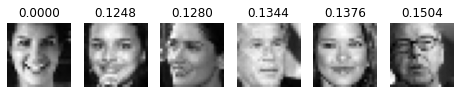

In [27]:
# plotando as imagens de consulta (distância=0) e as mais parecidas
plt.figure(figsize=(8,8))
plt.subplot(161); plt.imshow(imgs[ind[0]], cmap=plt.cm.gray); plt.title("%.4f"% dist[ind[0]]); plt.axis('off')
plt.subplot(162); plt.imshow(imgs[ind[1]], cmap=plt.cm.gray); plt.title("%.4f"% dist[ind[1]]); plt.axis('off')
plt.subplot(163); plt.imshow(imgs[ind[2]], cmap=plt.cm.gray); plt.title("%.4f"% dist[ind[2]]); plt.axis('off')
plt.subplot(164); plt.imshow(imgs[ind[3]], cmap=plt.cm.gray); plt.title("%.4f"% dist[ind[3]]); plt.axis('off')
plt.subplot(165); plt.imshow(imgs[ind[4]], cmap=plt.cm.gray); plt.title("%.4f"% dist[ind[4]]); plt.axis('off')
plt.subplot(166); plt.imshow(imgs[ind[5]], cmap=plt.cm.gray); plt.title("%.4f"% dist[ind[5]]); plt.axis('off');
